In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
df_train = pd.read_csv("./train.csv") # 학습용 데이터
df_test = pd.read_csv("./submission.csv") # 테스트 데이터(제출파일의 데이터)

In [4]:
df_train.head() # 학습용 데이터 살펴보기

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.0,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.0,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.0,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.0,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.0,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [6]:
df_train['is_converted'].value_counts()

False    54449
True      4850
Name: is_converted, dtype: int64

In [7]:
def resumetable(df):
    print(f'데이터셋 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(df_train)

데이터셋 형상: (59299, 29)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bant_submit,float64,0,5,1.0,1.0,1.0
1,customer_country,object,982,15399,/Quezon City/Philippines,/PH-00/Philippines,/Kolkata /India
2,business_unit,object,0,5,AS,AS,AS
3,com_reg_ver_win_rate,float64,44731,80,0.066667,0.066667,0.088889
4,customer_idx,int64,0,35112,32160,23122,1755
5,customer_type,object,43961,33,End-Customer,End-Customer,End-Customer
6,enterprise,object,0,2,Enterprise,Enterprise,Enterprise
7,historical_existing_cnt,float64,45543,136,NaN,12.0,144.0
8,id_strategic_ver,float64,55855,1,NaN,NaN,NaN
9,it_strategic_ver,float64,58178,1,NaN,NaN,NaN


<AxesSubplot:>

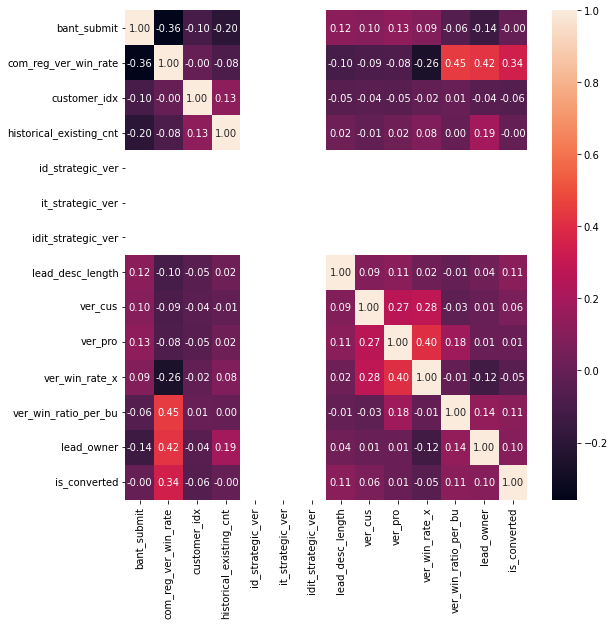

In [8]:
plt.figure(figsize=(9,9))
corr = df_train.corr()
sns.heatmap(corr,annot=True, fmt = '.2f')

- bant_submit & com_reg_ver_win_rate : 음
- com_reg_ver_win_rate & ver_win_rate_x
- ver_pro & ver_win_rate_x

<AxesSubplot:>

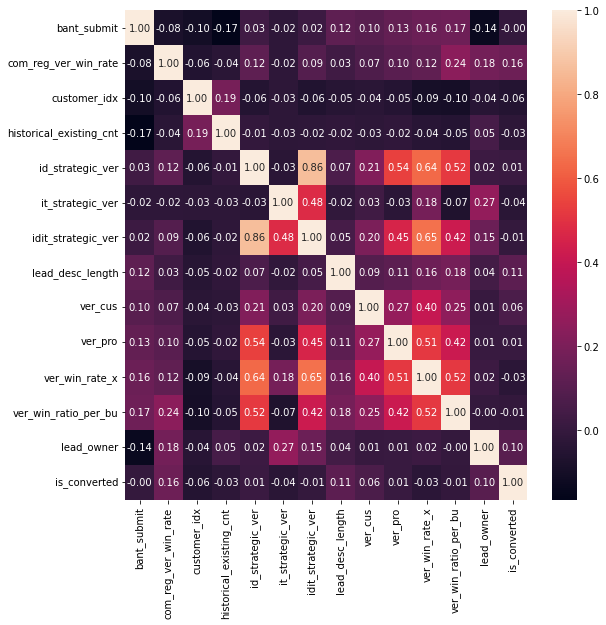

In [9]:
df_train_not_null = df_train.fillna(0)
plt.figure(figsize=(9,9))
corr = df_train_not_null.corr()
sns.heatmap(corr,annot=True, fmt = '.2f')

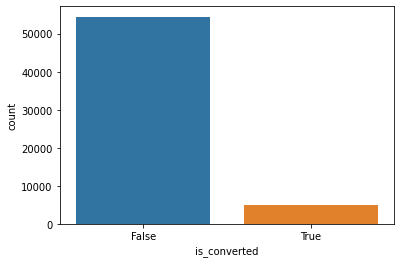

In [10]:
ax = sns.countplot(x='is_converted', data=df_train)

In [11]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['is_converted'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [12]:
crosstab = get_crosstab(df_train, 'customer_type')
crosstab

is_converted,customer_type,False,True
0,Administrator,100.000000,0.000000
1,Architect/Consultant,60.000000,40.000000
2,Channel Partner,87.865497,12.134503
3,Commercial end-user,100.000000,0.000000
4,Consultant,26.666667,73.333333
5,Corporate,100.000000,0.000000
6,Dealer/Distributor,100.000000,0.000000
7,Developer,100.000000,0.000000
8,Distributor,100.000000,0.000000
9,End Customer,82.207207,17.792793


- Architect/Consultant, Consultant, Homeowner, Installer, Others, Specifier / Influencer가 True 비율이 높음

In [37]:
df_train[df_train['customer_type']=='Installer']

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,cus_cou,cus_cou.1
13550,0.5,/malabon/Philippines,AS,NaN,26337,Installer,Enterprise,0.0,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,16,True,Philippines,Philippines
35710,0.5,/Mandaluyong/Philippines,AS,NaN,37516,Installer,SMB,28.0,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,59,True,Philippines,Philippines
35719,0.5,/Pampanga/Philippines,AS,NaN,37769,Installer,Enterprise,13.0,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,59,True,Philippines,Philippines
35721,0.5,/Mandaluyong /Philippines,AS,NaN,37516,Installer,SMB,28.0,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,59,True,Philippines,Philippines
58348,0.5,/Pampanga/Philippines,AS,0.136364,37245,Installer,Enterprise,NaN,NaN,NaN,...,0,0,0.000215,0.036913,factory,NaN,59,True,Philippines,Philippines


In [38]:
df = df_train.copy()
df = df.drop(['id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver'], axis=1)

In [39]:
df[df['customer_type']=='Installer']

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,customer_job,lead_desc_length,...,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,cus_cou,cus_cou.1
13550,0.5,/malabon/Philippines,AS,NaN,26337,Installer,Enterprise,0.0,engineering,4,...,0,0,NaN,NaN,NaN,NaN,16,True,Philippines,Philippines
35710,0.5,/Mandaluyong/Philippines,AS,NaN,37516,Installer,SMB,28.0,engineering,11,...,0,0,NaN,NaN,NaN,NaN,59,True,Philippines,Philippines
35719,0.5,/Pampanga/Philippines,AS,NaN,37769,Installer,Enterprise,13.0,engineering,19,...,0,0,NaN,NaN,NaN,NaN,59,True,Philippines,Philippines
35721,0.5,/Mandaluyong /Philippines,AS,NaN,37516,Installer,SMB,28.0,engineering,14,...,0,0,NaN,NaN,NaN,NaN,59,True,Philippines,Philippines
58348,0.5,/Pampanga/Philippines,AS,0.136364,37245,Installer,Enterprise,NaN,engineering,14,...,0,0,0.000215,0.036913,factory,NaN,59,True,Philippines,Philippines


In [42]:
crosstab = get_crosstab(df_train, 'historical_existing_cnt')
crosstab

is_converted,historical_existing_cnt,False,True
0,0.0,84.541308,15.458692
1,1.0,95.627860,4.372140
2,2.0,93.771044,6.228956
3,3.0,96.690647,3.309353
4,4.0,99.628001,0.371999
...,...,...,...
131,666.0,100.000000,0.000000
132,838.0,0.000000,100.000000
133,900.0,100.000000,0.000000
134,1104.0,100.000000,0.000000


In [41]:
df[df['customer_type']=='Consultant']

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,customer_job,lead_desc_length,...,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,cus_cou,cus_cou.1
13540,0.50,/Rizal/Philippines,AS,NaN,14618,Consultant,Enterprise,0.0,engineering,15,...,0,0,NaN,NaN,NaN,NaN,29,True,Philippines,Philippines
13564,0.50,/Makati City/Philippines,AS,NaN,18771,Consultant,SMB,0.0,consulting,21,...,0,0,NaN,NaN,NaN,NaN,16,True,Philippines,Philippines
13575,0.50,//Philippines,AS,NaN,18060,Consultant,SMB,0.0,engineering,43,...,0,0,NaN,NaN,NaN,NaN,84,True,Philippines,Philippines
13594,0.50,/Quezon City/Philippines,AS,NaN,27735,Consultant,SMB,0.0,consulting,19,...,0,0,NaN,NaN,NaN,NaN,0,True,Philippines,Philippines
13614,0.50,/BATAC CITY/Philippines,AS,NaN,6639,Consultant,SMB,1.0,NaN,14,...,0,0,NaN,NaN,NaN,NaN,83,True,Philippines,Philippines
19328,0.50,/Cavite Bacoor City/Philippines,AS,NaN,25290,Consultant,Enterprise,NaN,engineering,27,...,0,0,NaN,NaN,NaN,NaN,0,False,Philippines,Philippines
28359,0.50,//India,AS,0.071429,6117,Consultant,Enterprise,0.0,NaN,38,...,0,0,0.000215,0.036913,factory,NaN,672,False,India,India
29278,0.50,//Philippines,AS,0.066667,18771,Consultant,Enterprise,0.0,consulting,13,...,0,0,0.003079,0.026846,corporate / office,NaN,16,True,Philippines,Philippines
29754,0.25,/Bangkok/Thailand,AS,0.066667,40272,Consultant,Enterprise,0.0,NaN,3,...,0,0,0.003079,0.026846,corporate / office,NaN,683,False,Thailand,Thailand
35709,0.50,/Cebu/Philippines,AS,NaN,25797,Consultant,Enterprise,NaN,consulting,67,...,0,0,NaN,NaN,NaN,NaN,8,True,Philippines,Philippines


In [40]:
crosstab = get_crosstab(df_train, 'bant_submit')
crosstab

is_converted,bant_submit,False,True
0,0.00,84.015595,15.984405
1,0.25,90.102708,9.897292
2,0.50,94.549791,5.450209
3,0.75,90.437463,9.562537
4,1.00,91.547975,8.452025


In [13]:
crosstab = get_crosstab(df_train, 'enterprise')
crosstab

is_converted,enterprise,False,True
0,Enterprise,94.404891,5.595109
1,SMB,87.283882,12.716118


In [14]:
crosstab = get_crosstab(df_train, 'ver_pro')
crosstab

is_converted,ver_pro,False,True
0,0,91.877199,8.122801
1,1,90.773316,9.226684


In [15]:
crosstab = get_crosstab(df_train, 'ver_cus')
crosstab

is_converted,ver_cus,False,True
0,0,92.183981,7.816019
1,1,83.461694,16.538306


In [16]:
crosstab = get_crosstab(df_train, 'business_area')
crosstab

is_converted,business_area,False,True
0,corporate / office,93.458628,6.541372
1,education,93.688477,6.311523
2,factory,91.400966,8.599034
3,government department,94.000000,6.000000
4,hospital & health care,68.890742,31.109258
5,hotel & accommodation,94.038748,5.961252
6,power plant / renewable energy,82.300885,17.699115
7,public facility,93.448940,6.551060
8,residential (home),97.524752,2.475248
9,retail,94.752574,5.247426


In [17]:
crosstab = get_crosstab(df_train, 'business_subarea')
crosstab

is_converted,business_subarea,False,True
0,Advertising,86.666667,13.333333
1,Aerospace,100.000000,0.000000
2,Agriculture,93.333333,6.666667
3,Airline,100.000000,0.000000
4,Airport / Airfield / Helipad,93.750000,6.250000
...,...,...,...
81,Telecommunication,71.794872,28.205128
82,Townhouse,80.952381,19.047619
83,Travel Agency,100.000000,0.000000
84,Villa / Single-Family Home,91.279070,8.720930


In [18]:
df_train['cus_cou'] = df_train.customer_country.str.split('/').str[2]
df_train['cus_cou']

0        Philippines
1        Philippines
2              India
3              India
4              India
            ...     
59294         Poland
59295       Colombia
59296           Peru
59297           Peru
59298         France
Name: cus_cou, Length: 59299, dtype: object

In [19]:
crosstab = get_crosstab(df_train, 'cus_cou')
crosstab

is_converted,cus_cou,False,True
0,,95.804196,4.195804
1,CA 94555 United States,100.000000,0.000000
2,FL 33404,100.000000,0.000000
3,106-15 Sutphin Blvd Jamaica,100.000000,0.000000
4,750 Florida Central Parkway Suite #100 Longwo...,100.000000,0.000000
...,...,...,...
996,Żółwin,100.000000,0.000000
997,تيماء,100.000000,0.000000
998,วังน้อย,100.000000,0.000000
999,新竹,100.000000,0.000000


In [20]:
print(df_train['customer_country'].value_counts())
print(df_train['cus_cou'].value_counts())

//India                                   3037
/São Paulo/Brazil                         1344
//United States                            962
//United Kingdom                           805
//Saudi Arabia                             718
                                          ... 
/Hydrated/India                              1
/Tirurangadi, Malappuram, Kerala/India       1
/Canoinhas / SC/Brazil                       1
/Tupã/SP/Brazil                              1
/paris/France                                1
Name: customer_country, Length: 15399, dtype: int64
India             16469
Brazil             7937
United States      3695
Philippines        2466
Mexico             2283
                  ...  
San Pablo City        1
Sta. Rosa City        1
Binan                 1
Bacolod City          1
MAHE                  1
Name: cus_cou, Length: 1001, dtype: int64


In [21]:
df_train['cus_cou.1'] = df_train['customer_country.1'].str.split('/').str[2]
df_train['cus_cou.1']

0        Philippines
1        Philippines
2              India
3              India
4              India
            ...     
59294         Poland
59295       Colombia
59296           Peru
59297           Peru
59298         France
Name: cus_cou.1, Length: 59299, dtype: object

In [22]:
df_train['cus_cou.1'].value_counts()

India             16469
Brazil             7937
United States      3695
Philippines        2466
Mexico             2283
                  ...  
San Pablo City        1
Sta. Rosa City        1
Binan                 1
Bacolod City          1
MAHE                  1
Name: cus_cou.1, Length: 1001, dtype: int64

In [23]:
df_train[df_train['cus_cou'] != df_train['cus_cou.1']]

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted,cus_cou,cus_cou.1
106,0.75,NaN,AS,0.066667,8529,NaN,Enterprise,NaN,NaN,NaN,...,0,0,0.003079,0.026846,corporate / office,NaN,60,False,NaN,NaN
109,1.00,/Indonesia,AS,0.066667,33914,NaN,SMB,NaN,NaN,NaN,...,0,0,0.003079,0.026846,corporate / office,NaN,63,False,NaN,NaN
121,1.00,NaN,AS,0.040816,47151,NaN,SMB,NaN,NaN,NaN,...,0,0,0.003079,0.026846,corporate / office,NaN,53,False,NaN,NaN
132,1.00,/Philippines,AS,0.066667,44490,NaN,SMB,NaN,NaN,NaN,...,0,0,0.003079,0.026846,corporate / office,NaN,75,False,NaN,NaN
142,1.00,NaN,AS,0.040816,36540,NaN,Enterprise,NaN,NaN,NaN,...,0,0,0.003079,0.026846,corporate / office,NaN,68,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59119,0.50,NaN,ID,NaN,18173,NaN,Enterprise,NaN,NaN,NaN,...,0,0,0.000026,0.031579,public facility,NaN,259,False,NaN,NaN
59196,1.00,NaN,AS,NaN,34026,NaN,SMB,NaN,NaN,NaN,...,0,0,0.000026,0.028777,public facility,NaN,122,False,NaN,NaN
59200,1.00,/Indonesia,AS,NaN,33904,NaN,Enterprise,NaN,NaN,NaN,...,0,0,0.000026,0.028777,public facility,NaN,617,False,NaN,NaN
59252,0.50,NaN,AS,0.043478,29078,NaN,Enterprise,NaN,NaN,NaN,...,0,0,0.000026,0.028777,public facility,NaN,68,False,NaN,NaN


In [24]:
crosstab = get_crosstab(df_train, 'business_unit')
crosstab

is_converted,business_unit,False,True
0,AS,94.417535,5.582465
1,CM,100.000000,0.000000
2,ID,89.750812,10.249188
3,IT,90.258541,9.741459
4,Solution,98.986486,1.013514


#### inquiry_type 별 lead_desc_length

<AxesSubplot:xlabel='inquiry_type', ylabel='lead_desc_length'>

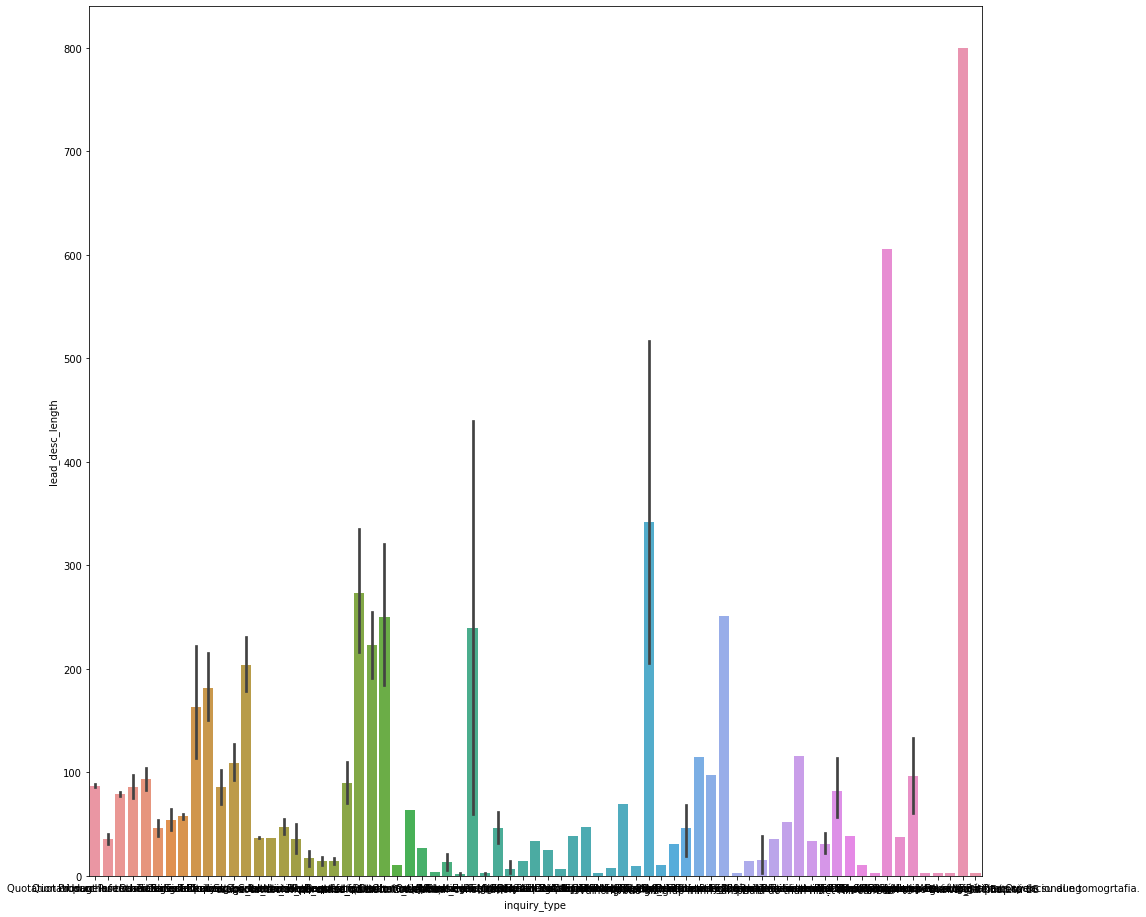

In [29]:
plt.figure(figsize=(16,16))
sns.barplot(x='inquiry_type', y='lead_desc_length', data=df_train)

In [30]:
df_train['inquiry_type'].value_counts()

Quotation or purchase consultation                                                                                     23274
Quotation or Purchase Consultation                                                                                     18766
Sales Inquiry                                                                                                           9977
Product Information                                                                                                     1237
Other                                                                                                                    929
                                                                                                                       ...  
quotation_                                                                                                                 1
display product                                                                                                            1


In [35]:
df_train[df_train['lead_desc_length']>1000][['inquiry_type', 'lead_desc_length']]

,inquiry_type,lead_desc_length
5,Quotation or purchase consultation,1114
147,Quotation or purchase consultation,1072
401,Quotation or Purchase Consultation,1060
1045,Quotation or Purchase Consultation,1021
1162,Request for Partnership,1126
...,...,...
59125,Quotation or Purchase Consultation,1018
59127,Quotation or Purchase Consultation,1018
59162,Quotation or purchase consultation,1090
59164,Quotation or purchase consultation,1060


In [36]:
crosstab = get_crosstab(df_train, 'response_corporate')
crosstab

is_converted,response_corporate,False,True
0,LGEAF,54.513889,45.486111
1,LGEAG,100.000000,0.000000
2,LGEAP,87.158470,12.841530
3,LGEAR,82.688391,17.311609
4,LGEAS,96.969697,3.030303
5,LGEBN,92.929293,7.070707
6,LGEBT,100.000000,0.000000
7,LGECB,96.440596,3.559404
8,LGECH,96.923077,3.076923
9,LGECI,92.395437,7.604563


<AxesSubplot:xlabel='ver_win_ratio_per_bu', ylabel='historical_existing_cnt'>

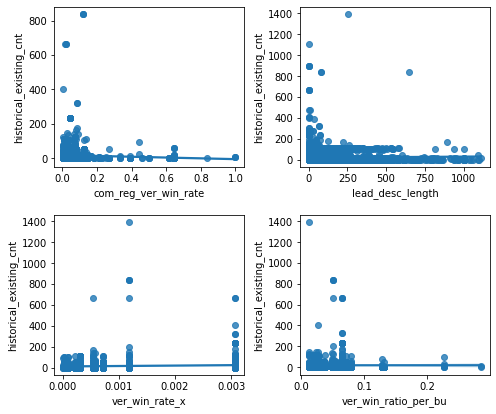

In [51]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(7,6)

sns.regplot(x='com_reg_ver_win_rate', y='historical_existing_cnt', data=df_train, ax=axes[0,0])
sns.regplot(x='lead_desc_length', y='historical_existing_cnt', data=df_train, ax=axes[0,1])
sns.regplot(x='ver_win_rate_x', y='historical_existing_cnt', data=df_train, ax=axes[1,0])
sns.regplot(x='ver_win_ratio_per_bu', y='historical_existing_cnt', data=df_train, ax=axes[1,1])

In [19]:
df_train['enterprise'].value_counts()

Enterprise    37783
SMB           21516
Name: enterprise, dtype: int64

### 레이블 인코딩

In [20]:
def label_encoding(series: pd.Series) -> pd.Series:
    """범주형 데이터를 시리즈 형태로 받아 숫자형 데이터로 변환합니다."""

    my_dict = {}

    # 모든 요소를 문자열로 변환
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

In [21]:
# 레이블 인코딩할 칼럼들
label_columns = [
    "customer_country",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_country.1",
    "customer_position",
    "response_corporate",
    "expected_timeline",
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])

for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

In [22]:
for col in label_columns:  
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

### 학습, 검증 데이터 분리

In [23]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(x_train.fillna(0), y_train)

ValueError: could not convert string to float: 'Saudi Arabia'

### 모델 성능 확인

In [ ]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("오차행렬:\n", confusion)
    print("\n정확도: {:.4f}".format(accuracy))
    print("정밀도: {:.4f}".format(precision))
    print("재현율: {:.4f}".format(recall))
    print("F1: {:.4f}".format(F1))

In [ ]:
pred = model.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

### 제출

In [ ]:
# 예측에 필요한 데이터 분리
x_test = df_test.drop(["is_converted", "id"], axis=1)

In [ ]:
test_pred = model.predict(x_test.fillna(0))
sum(test_pred) # True로 예측된 개수

In [ ]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)